In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import os


In [ ]:
np.float32 is np.single

In [ ]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder {folder_path} created successfully.")
    else:
        print(f"Folder {folder_path} already exists.")


create_folder_if_not_exists("plots")
create_folder_if_not_exists("errors")
create_folder_if_not_exists("files")

In [ ]:
def get_A1(n, variable_type):
    A_ = np.zeros((n, n), dtype=variable_type)
    N = np.zeros(n, dtype=variable_type)
    for i in range(n):
        tmp = variable_type(i)
        N[i] = tmp
    for i in N:
        for j in N:
            index_i = int(i)
            index_j = int(j)
            if index_i == 0:
                A_[index_i][index_j] = variable_type(1)
            else:
                one = variable_type(1)
                A_[index_i][index_j] = one / ((i + one) + (j + one) - one)
    return A_


get_A1(3, np.float64)


In [ ]:
def get_A2(n, variable_type):
    A_ = np.zeros((n, n), dtype=variable_type)
    N = np.zeros(n, dtype=variable_type)
    one = variable_type(1)
    two = variable_type(2)
    for i in range(n):
        tmp = variable_type(i)
        N[i] = tmp
    for i in N:
        for j in N:
            index_i = int(i)
            index_j = int(j)
            if j >= i:
                A_[index_i][index_j] = (two * (i + one)) / (j + one)
            else:
                A_[index_i][index_j] = (two * (j + one)) / (i + one)
    return A_


get_A2(3, np.float64)

In [ ]:
def get_random_sign():
    return np.random.choice([-1, 1])


def get_x(n, variable_type):
    x_ = np.zeros(n, dtype=variable_type)
    for i in range(n):
        x_[i] = variable_type(variable_type(get_random_sign()))
    return x_


def get_error(correct, actual):
    if len(correct) != len(actual):
        print("Error: vectors have different lengths")
        return
    error = -np.inf
    for i in range(len(correct)):
        tmp = np.abs(correct[i] - actual[i])
        if tmp > error:
            error = tmp
    return error

In [ ]:
import csv


def save_to_csv(filename, data):
    filename = "files/" + filename + ".csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)


def read_from_csv(filename, variable_type):
    filename = "files/" + filename + ".csv"
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        data = list(reader)
        for arr in range(len(data)):
            data[arr] = np.array(data[arr], dtype=variable_type)
    return data


def generate_data():
    sizes = [i for i in range(3, 20 + 1)]
    sizes.append(50)
    sizes.append(100)
    sizes.append(200)
    xes = []
    for size in sizes:
        xes.append(get_x(size, np.float64))
    return save_to_csv("xes", xes)

In [ ]:
def get_b(A, x, n, variable_type):
    b = np.zeros(n, dtype=variable_type)
    for i in range(n):
        for j in range(n):
            b[i] += A[i][j] * x[j]
        print()
    return b

In [ ]:
def thomas(A, b, variable_type):
    n = len(A)
    x = np.zeros(n, dtype=variable_type)
    betas = np.zeros(n, dtype=variable_type)
    betas[0] = - A[0][1] / A[0][0]
    gammas = np.zeros(n, dtype=variable_type)
    gammas[0] = b[0] / A[0][0]
    for i in range(1, n):
        if i == n - 1:
            betas[i] = 0
        else:
            betas[i] = - A[i][i + 1] / (A[i][i] + A[i][i - 1] * betas[i - 1])
        gammas[i] = (b[i] - A[i][i - 1] * gammas[i - 1]) / (A[i][i] + A[i][i - 1] * betas[i - 1])
    x[-1] = gammas[-1]
    for i in range(n - 2, -1, -1):
        x[i] = betas[i] * x[i + 1] + gammas[i]
    return x


#write a function which is given a matrix A and a vector b and returns the solution vector x
def gauss(A, b, variable_type):
    n = len(A)
    x = np.zeros(n, dtype=variable_type)
    print(f"n = {len(A)}")
    for i in range(n):
        for j in range(i + 1, n):
            if A[i][i] == variable_type(0):
                print(f"Division by 0, n = {n}, variable_type = {variable_type}, A[i][i] = {A[i][i]}")
                return
            m = A[j][i] / A[i][i]
            print(f"m = {m}, i = {i}, j = {j}, A[j][i] = {A[j][i]}, A[i][i] = {A[i][i]}")
            for k in range(i, n):
                A[j][k] -= m * A[i][k]
            b[j] -= m * b[i]
    print()
    #print(b)
    #print(A)
    for i in range(n - 1, -1, -1):
        if A[i][i] == variable_type(0):
            print("Division by 0")
            return
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]
    #print(b)
    return x

**Wykonanie**

In [111]:
def draw_plot(domain, float32_results, float64_results, title, x_label="n", y_label="wartości błędu", scale_type=None,
              filename=None, float32_label="float32", float64_label="float64"):
    fig, ax = plt.subplots(figsize=(15, 7.5))
    if scale_type is not None:
        ax.set_yscale(scale_type)
    plt.scatter(x=domain, y=float32_results, label=float32_label)
    plt.scatter(x=domain, y=float64_results, label=float64_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(f"plots/{filename}.png")
    #plt.show()


def perform_tests(get_matrix_fn, method):
    def run_test_gauss(correct_x, variable_type):
        nonlocal get_matrix_fn
        nonlocal method
        n = len(correct_x)
        A = get_matrix_fn(n, variable_type)
        b = get_b(A, correct_x, n, variable_type)
        x_result = method(A, b, variable_type)
        error = get_error(correct_x, x_result)
        return error

    xes_32 = read_from_csv("xes", np.float32)
    xes_64 = read_from_csv("xes", np.float64)
    if len(xes_32) != len(xes_64):
        print("Error: vectors have different lengths")
        return
    errors_32 = []
    errors_64 = []
    domain = []
    for x in range(len(xes_32) - 3):
        if len(xes_32[x]) != len(xes_64[x]):
            print("Error: vectors have different lengths V2")
            return
        domain.append(len(xes_32[x]))
        errors_32.append(run_test_gauss(xes_32[x], np.float32))
        errors_64.append(run_test_gauss(xes_64[x], np.float64))

    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala liniowa",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_linear")

    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala logarytmiczna", scale_type="log",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_log")
    for i in range(len(errors_32)):
        print(f"i = {i + 3}, {errors_32[i]}, {errors_64[i]}")
    #print("errors32", errors_32)

    #print("ASDASD")
    #print("errors64", errors_64, len(errors_64))





In [ ]:
perform_tests(get_A1, gauss)

In [ ]:
perform_tests(get_A2, gauss)

i = 3, 863.9999999999973, 8.666666666666664
i = 4, 37920.00000000528, 16.5
i = 5, 1442000.0000029379, 26.800000000000008
i = 6, 56344679.99821772, 39.66666666666671
i = 7, 2232478705.9287925, 54.57142857142862
i = 8, 81552932521.58138, 72.41666666666669
i = 9, 2843171843290.0137, 92.38095238095238
i = 10, 108960945817879.52, 114.7285714285715
i = 11, 3951758149661761.5, 139.78282828282846
i = 12, 1.3645355353847907e+17, 166.82222222222228
i = 13, 2.7253923186329027e+18, 196.75710955710977
i = 14, 2.7451395213867325e+18, 228.887012987014
i = 15, 1.0433483999586587e+19, 263.29370629370794
i = 16, 2.895360864787883e+18, 300.52822177822173
i = 17, 1.3547271121323405e+19, 339.7256625727215
i = 18, 2.213939234398773e+21, 381.73629426129605
i = 19, 3.5706711768479363e+19, 426.0365188990573
i = 20, 1.220424720053462e+19, 472.50521439345147


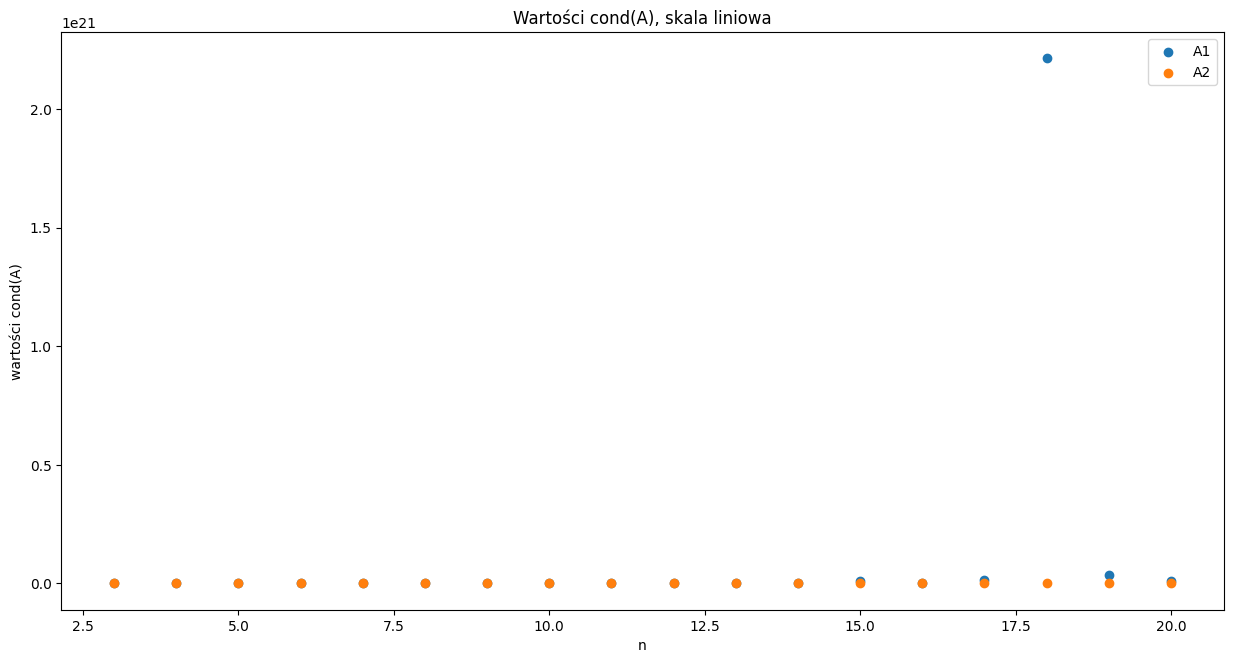

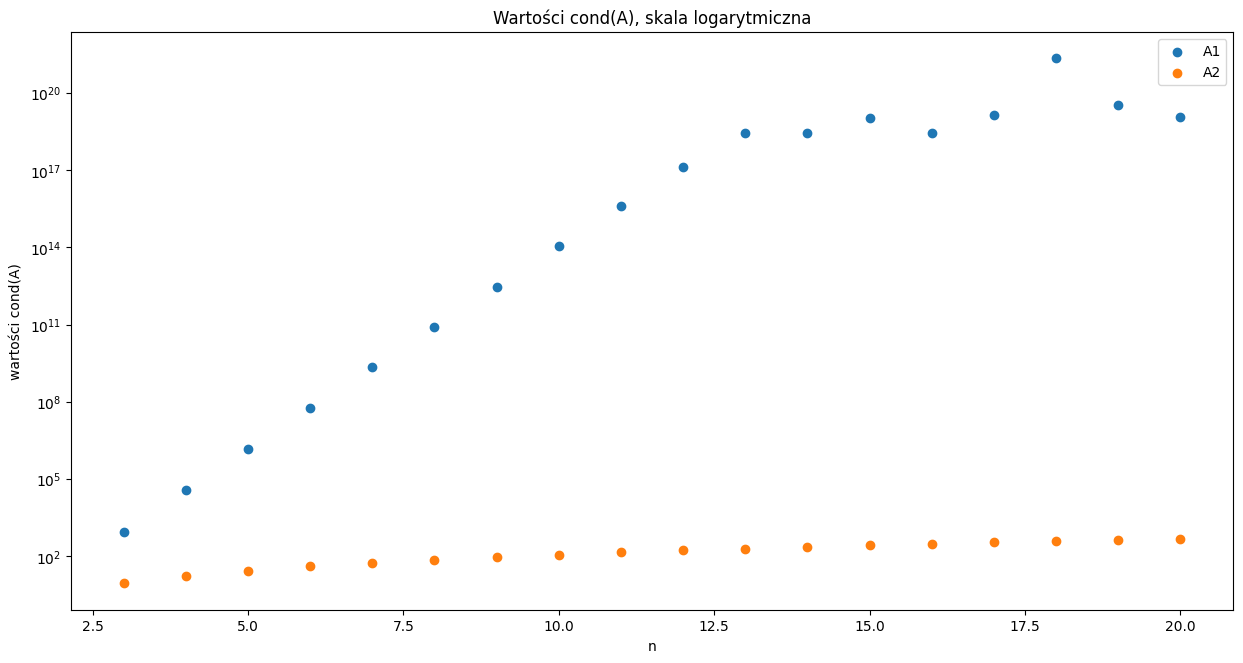

In [118]:
def investigate_cond_values():
    sizes_to_checkout = [i for i in range(3, 20 + 1)]
    A1_cond = []
    A2_cond = []
    for size in sizes_to_checkout:
        A1 = get_A1(size, np.float64)
        A2 = get_A2(size, np.float64)
        A1_cond.append(np.linalg.cond(x=A1, p=np.inf))
        A2_cond.append(np.linalg.cond(x=A2, p=np.inf))
    draw_plot(domain=sizes_to_checkout, float32_results=A1_cond, float64_results=A2_cond,
              title=f"Wartości cond(A), skala liniowa",
              filename=f"cond_linear", float32_label="A1", float64_label="A2", y_label="wartości cond(A)")
    draw_plot(domain=sizes_to_checkout, float32_results=A1_cond, float64_results=A2_cond,
              title=f"Wartości cond(A), skala logarytmiczna", scale_type="log",
              filename=f"cond_log", float32_label="A1", float64_label="A2", y_label="wartości cond(A)")
    for i in range(len(sizes_to_checkout)):
        print(f"i = {i + 3}, {A1_cond[i]}, {A2_cond[i]}")
investigate_cond_values()